- Downloading libraries

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [84]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 7.3 MB 5.0 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


# Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import math


import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [26]:
temp_by_country = pd.read_csv('/Users/rahuldandona/Desktop/ET_MiniProject/GlobalLandTemperaturesByCountry.csv')
temp_by_country.head()


dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [27]:
temp_by_country

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [28]:
temp_by_country.dtypes


dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [29]:
temp_by_country.shape

(577462, 4)

In [30]:
temp_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [31]:
temp_by_country.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

- Checking the null values

<AxesSubplot:>

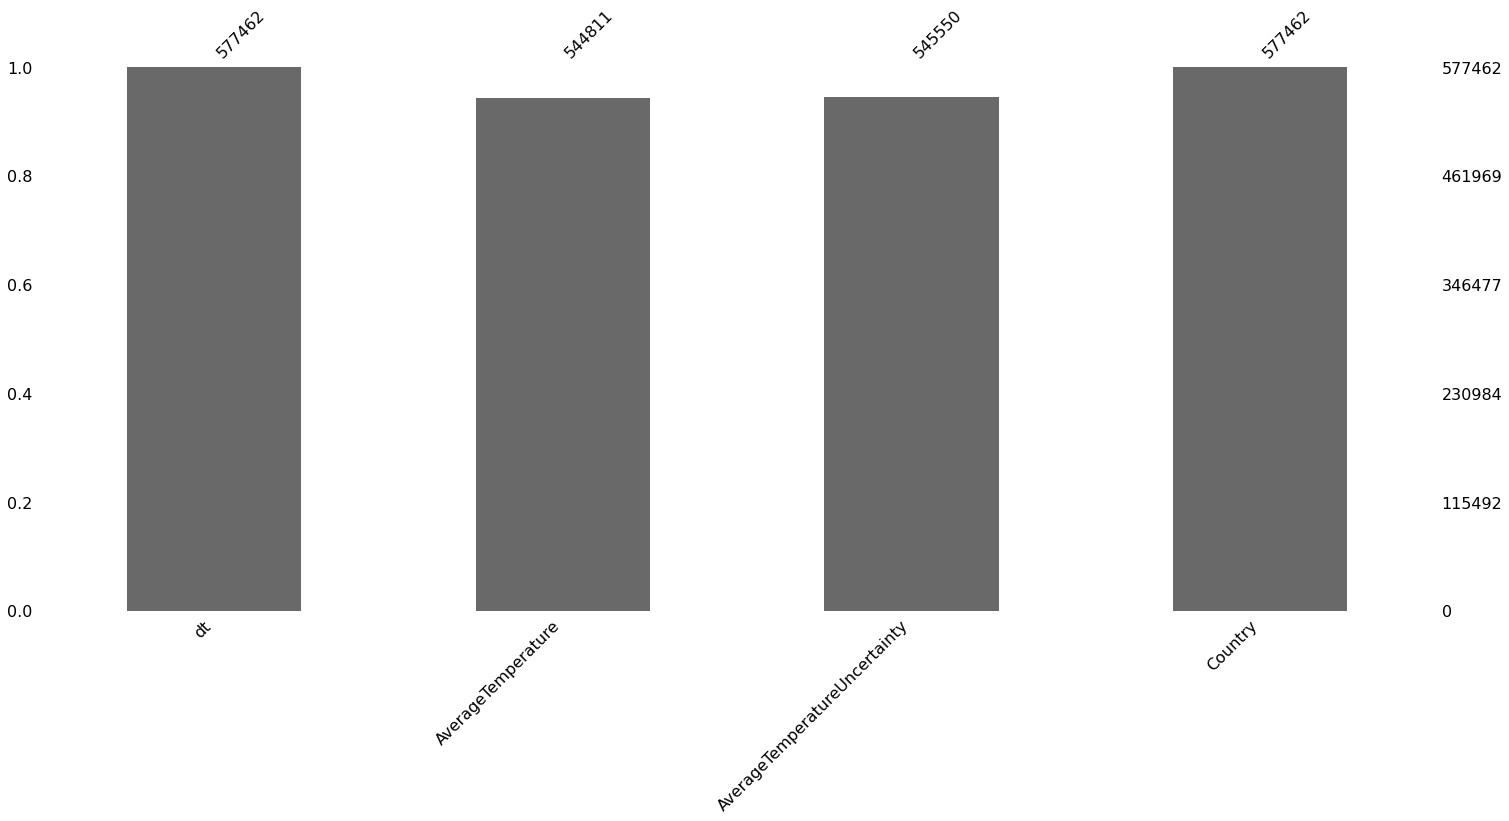

In [32]:
msno.bar(temp_by_country)

# EDA

 - Is there any Global Warming?

In [33]:
temp_by_country['dt'][0].split('-')[0]


'1743'

In [34]:
def fetch_year(date):
    return date.split('-')[0]

In [35]:
temp_by_country['years']=temp_by_country['dt'].apply(fetch_year)

In [36]:
temp_by_country.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country years
0  1743-11-01               4.384                          2.294   Åland  1743
1  1743-12-01                 NaN                            NaN   Åland  1743
2  1744-01-01                 NaN                            NaN   Åland  1744
3  1744-02-01                 NaN                            NaN   Åland  1744
4  1744-03-01                 NaN                            NaN   Åland  1744

In [37]:
by_country=temp_by_country[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')
byx=pd.concat([by_country[20:23],by_country[72:75]],axis=0)

In [38]:
byx

AverageTemperature
Country                    
Åland              5.291383
Latvia             5.320545
Belarus            5.819288
Albania           12.610646
Italy             12.737122
France            12.772446

<AxesSubplot:xlabel='Country', ylabel='AverageTemperature'>

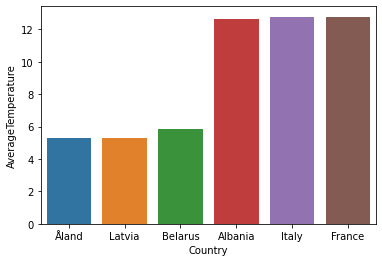

In [39]:
sns.barplot(x=byx.index, y=byx['AverageTemperature'][:])

### "Analysing India's Climate Change"

In [40]:
temp_India=temp_by_country.loc[(temp_by_country.Country == 'India')]
temp_India['dt'] = pd.to_datetime(temp_India['dt'])
temp_India.set_index('dt',inplace = True)
temp_India['AverageTemperature'].mean()

23.87378947368426

In [42]:
temp_India

AverageTemperature  AverageTemperatureUncertainty Country years
dt                                                                         
1796-01-01              17.044                          2.044   India  1796
1796-02-01              19.193                          1.359   India  1796
1796-03-01              22.319                          2.125   India  1796
1796-04-01              27.233                          1.510   India  1796
1796-05-01              30.035                          1.338   India  1796
...                        ...                            ...     ...   ...
2013-05-01              31.014                          0.205   India  2013
2013-06-01              28.766                          0.299   India  2013
2013-07-01              27.012                          0.197   India  2013
2013-08-01              26.555                          0.242   India  2013
2013-09-01                 NaN                            NaN   India  2013

[2613 rows x 4 columns]

- Data Visualisation 

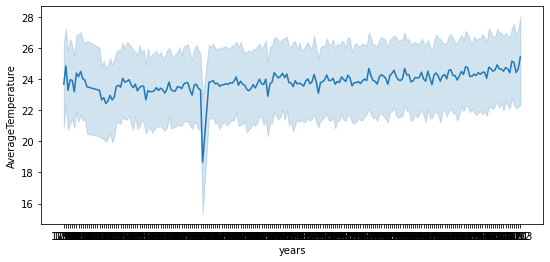

In [25]:
plt.figure(figsize=(9,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_India)
plt.show()

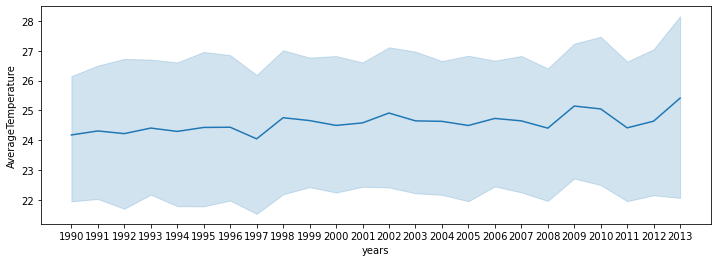

In [26]:
temp_India_latest=temp_India.loc['1990':'2013']
plt.figure(figsize=(12,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_India_latest)
plt.show()

In [28]:
temp_India.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=2613, freq=None)

In [29]:
temp_India['month']=temp_India.index.month
temp_India

AverageTemperature  AverageTemperatureUncertainty Country years  \
dt                                                                            
1796-01-01              17.044                          2.044   India  1796   
1796-02-01              19.193                          1.359   India  1796   
1796-03-01              22.319                          2.125   India  1796   
1796-04-01              27.233                          1.510   India  1796   
1796-05-01              30.035                          1.338   India  1796   
...                        ...                            ...     ...   ...   
2013-05-01              31.014                          0.205   India  2013   
2013-06-01              28.766                          0.299   India  2013   
2013-07-01              27.012                          0.197   India  2013   
2013-08-01              26.555                          0.242   India  2013   
2013-09-01                 NaN                            NaN   India  2013   

            month  
dt                 
1796-01-01      1  
1796-02-01      2  
1796-03-01      3  
1796-04-01      4  
1796-05-01      5  
...           ...  
2013-05-01      5  
2013-06-01      6  
2013-07-01      7  
2013-08-01      8  
2013-09-01      9  

[2613 rows x 5 columns]

In [30]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [31]:
temp_India['season']=temp_India['month'].apply(get_season)
years=temp_India['years'].unique()
temp_India.head()


AverageTemperature  AverageTemperatureUncertainty Country years  \
dt                                                                            
1796-01-01              17.044                          2.044   India  1796   
1796-02-01              19.193                          1.359   India  1796   
1796-03-01              22.319                          2.125   India  1796   
1796-04-01              27.233                          1.510   India  1796   
1796-05-01              30.035                          1.338   India  1796   

            month  season  
dt                         
1796-01-01      1  winter  
1796-02-01      2  winter  
1796-03-01      3  spring  
1796-04-01      4  spring  
1796-05-01      5  spring

In [35]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=temp_India[temp_India['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['AverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['AverageTemperature'].mean())

In [36]:
len(spring_temp)

218

- Monthly Analysis

Text(0, 0.5, 'Temperature')

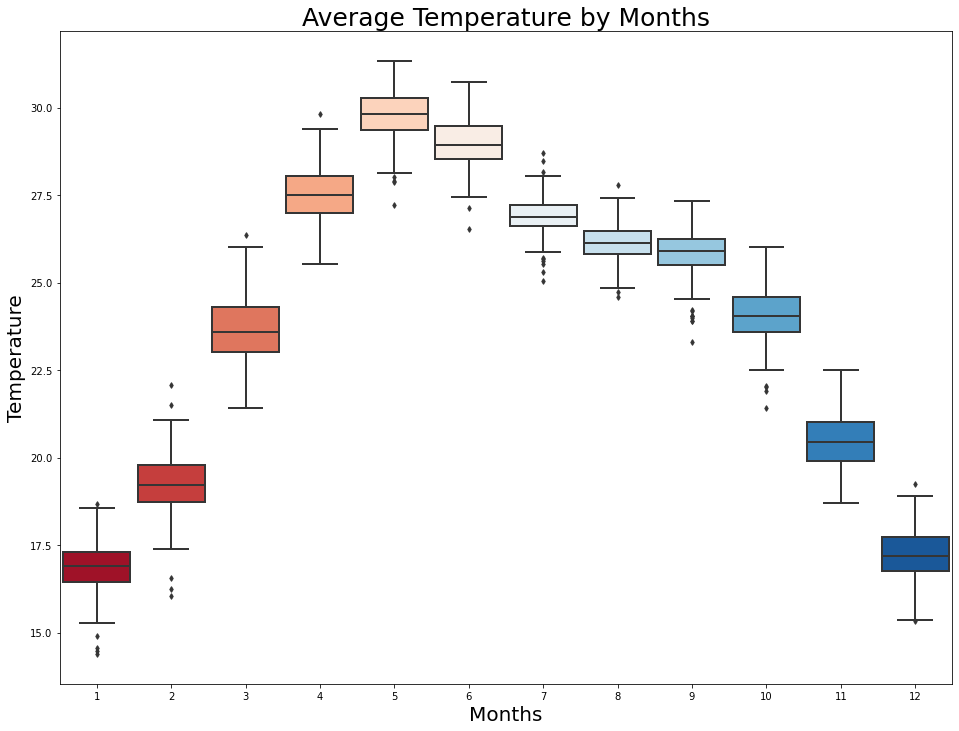

In [37]:
GlobalTemp=temp_India
GlobalTemp.loc[GlobalTemp['month']=='1','month'] = 'January'
GlobalTemp.loc[GlobalTemp['month']=='2','month'] = 'February'
GlobalTemp.loc[GlobalTemp['month']=='3','month'] = 'March'
GlobalTemp.loc[GlobalTemp['month']=='4','month'] = 'April'
GlobalTemp.loc[GlobalTemp['month']=='5','month'] = 'May'
GlobalTemp.loc[GlobalTemp['month']=='6','month'] = 'June'
GlobalTemp.loc[GlobalTemp['month']=='7','month'] = 'July'
GlobalTemp.loc[GlobalTemp['month']=='8','month'] = 'August'
GlobalTemp.loc[GlobalTemp['month']=='9','month'] = 'September'
GlobalTemp.loc[GlobalTemp['month']=='10','month'] = 'October'
GlobalTemp.loc[GlobalTemp['month']=='11','month'] = 'November'
GlobalTemp.loc[GlobalTemp['month']=='12','month'] = 'December'
year_month = GlobalTemp.groupby(by = ['years','month']).mean().reset_index()
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', y = 'AverageTemperature', data = year_month, palette = "RdBu", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Average Temperature by Months', fontsize = 25)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

In [38]:
year_month

years  month  AverageTemperature  AverageTemperatureUncertainty
0     1796      1              17.044                          2.044
1     1796      2              19.193                          1.359
2     1796      3              22.319                          2.125
3     1796      4              27.233                          1.510
4     1796      5              30.035                          1.338
...    ...    ...                 ...                            ...
2608  2013      5              31.014                          0.205
2609  2013      6              28.766                          0.299
2610  2013      7              27.012                          0.197
2611  2013      8              26.555                          0.242
2612  2013      9                 NaN                            NaN

[2613 rows x 4 columns]

In [39]:
year_season = GlobalTemp.groupby(by = ['years','season']).mean().reset_index()
winter = year_season.loc[year_season['season'] == 'winter',:]
spring = year_season.loc[year_season['season'] == 'spring',:]
summer = year_season.loc[year_season['season'] == 'summer',:]
autumn = year_season.loc[year_season['season'] == 'autumn',:]

In [40]:
year_season

years  season  AverageTemperature  AverageTemperatureUncertainty
0    1796  autumn           23.391667                       2.471333
1    1796  spring           26.529000                       1.657667
2    1796  summer           27.539667                       2.669667
3    1796  winter           17.240667                       2.379000
4    1797  autumn           23.021667                       2.121667
..    ...     ...                 ...                            ...
867  2012  winter           18.397000                       0.234333
868  2013  autumn                 NaN                            NaN
869  2013  spring           27.856667                       0.294333
870  2013  summer           27.444333                       0.246000
871  2013  winter           18.701500                       0.363500

[872 rows x 4 columns]

In [41]:
import plotly.graph_objects as go
fig2 = go.Figure()
for template in ["plotly_white"]:
    fig2.add_trace(go.Scatter(x=winter['years'], y=winter['AverageTemperature'],
                    mode='lines',
                    name='winter',
                    marker_color='#838B8B'))
    fig2.add_trace(go.Scatter(x=spring['years'], y=spring['AverageTemperature'],
                    mode='lines',
                    name='spring',
                    marker_color='#FFB5C5'))
    fig2.add_trace(go.Scatter(x=summer['years'], y=summer['AverageTemperature'],
                    mode='lines',
                    name='summer',
                    marker_color='#87CEFF'))
    fig2.add_trace(go.Scatter(x=autumn['years'], y=autumn['AverageTemperature'],
                    mode='lines',
                    name='autumn',
                    marker_color='#FF8000'))
    fig2.update_layout(
    height=800,
    xaxis_title="Years",
    yaxis_title='Temperature in degree',
    title_text='Average Temperature seasonwise over the years',
    template=template)




fig2.show()


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

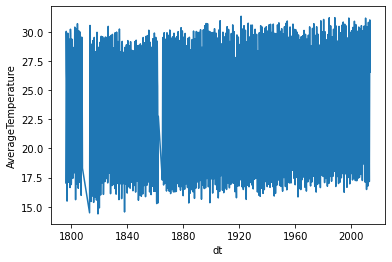

In [44]:
sns.lineplot(x=temp_India.index,y=temp_India['AverageTemperature'])


### Whether it is stationary or not?

## Conditions

1. Time series should have a constant mean
2. Time series should have a standard deviation
3. Time series' auto-covariance should not depend on time

In [56]:
temp_India1 = temp_India.dropna()
temp_India1['AverageTemperature']

dt
1796-01-01    17.044
1796-02-01    19.193
1796-03-01    22.319
1796-04-01    27.233
1796-05-01    30.035
               ...  
2013-04-01    27.981
2013-05-01    31.014
2013-06-01    28.766
2013-07-01    27.012
2013-08-01    26.555
Name: AverageTemperature, Length: 2508, dtype: float64

In [62]:
test_result

(-4.558478434336362,
 0.0001539507738903773,
 26,
 2481,
 {'1%': -3.4329884839681255,
  '5%': -2.8627056642784483,
  '10%': -2.567390528901554},
 6022.386893718265)

In [63]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [66]:
adfuller_test(temp_India1['AverageTemperature'])

ADF Test Statistic : -4.558478434336362
p-value : 0.0001539507738903773
#Lags Used : 26
Number of Observations Used : 2481
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


ADF Test Statistic : -12.669741373914281
p-value : 1.2520575899382585e-23
#Lags Used : 26
Number of Observations Used : 2457
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

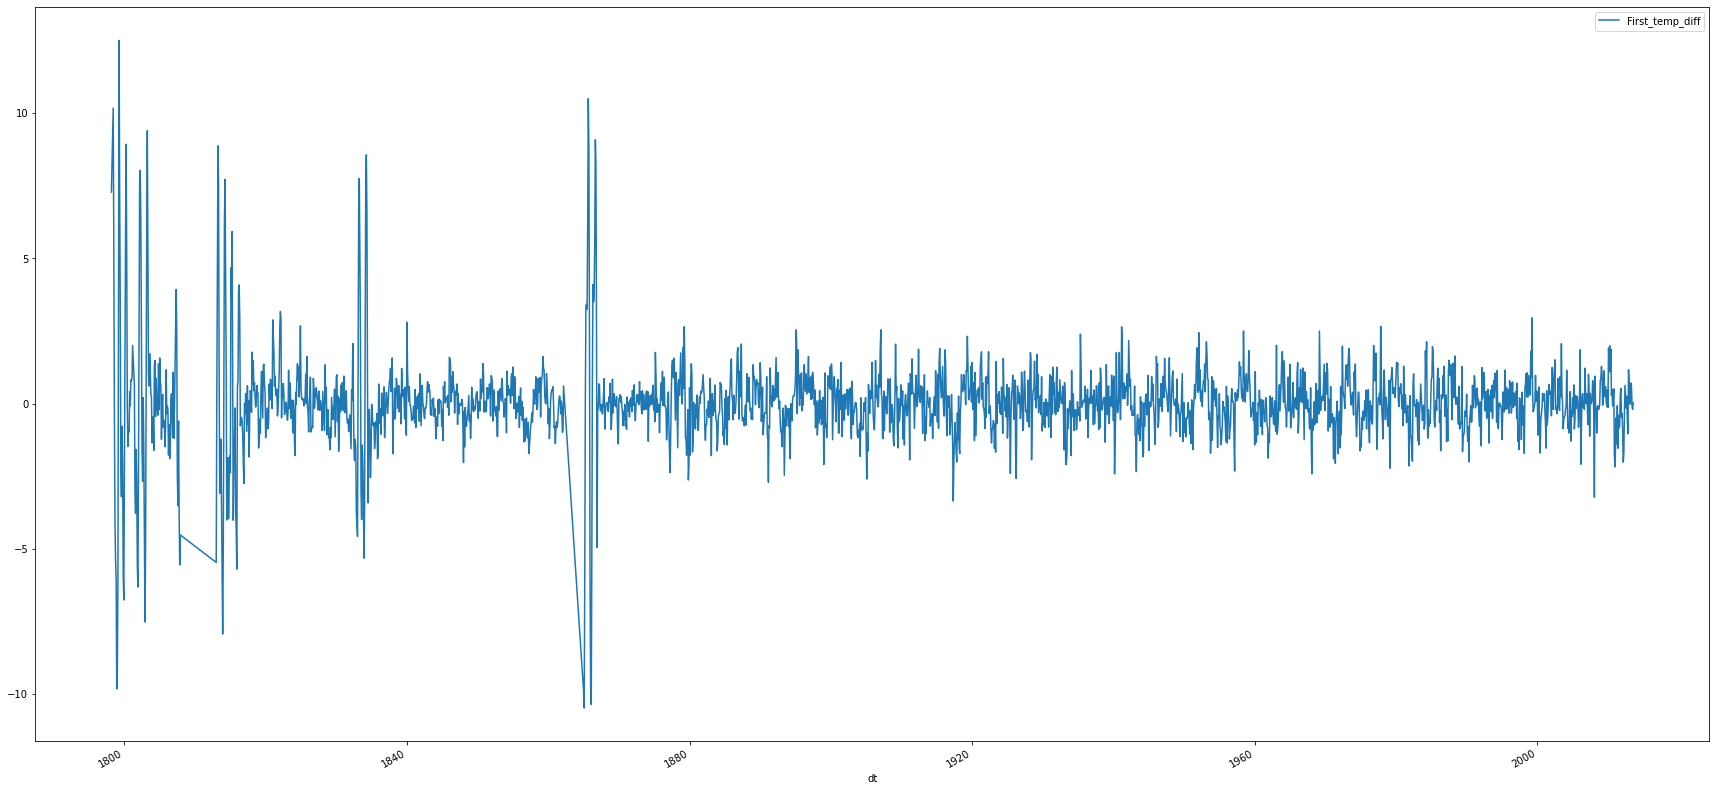

In [67]:
df=temp_India1.copy()

df.head()

df['First_temp_diff']=df['AverageTemperature']-df['AverageTemperature'].shift(24)

adfuller_test(df['First_temp_diff'].dropna())

df[['First_temp_diff']].plot(figsize=(30,15))

- Examine if there is a seasonality factor in data or not?

In [68]:
df

AverageTemperature  AverageTemperatureUncertainty Country years  \
dt                                                                            
1796-01-01              17.044                          2.044   India  1796   
1796-02-01              19.193                          1.359   India  1796   
1796-03-01              22.319                          2.125   India  1796   
1796-04-01              27.233                          1.510   India  1796   
1796-05-01              30.035                          1.338   India  1796   
...                        ...                            ...     ...   ...   
2013-04-01              27.981                          0.299   India  2013   
2013-05-01              31.014                          0.205   India  2013   
2013-06-01              28.766                          0.299   India  2013   
2013-07-01              27.012                          0.197   India  2013   
2013-08-01              26.555                          0.242   India  2013   

           month  season  First_temp_diff  
dt                                         
1796-01-01     1  winter              NaN  
1796-02-01     2  winter              NaN  
1796-03-01     3  spring              NaN  
1796-04-01     4  spring              NaN  
1796-05-01     5  spring              NaN  
...          ...     ...              ...  
2013-04-01     4  spring            0.708  
2013-05-01     5  spring            0.593  
2013-06-01     6  summer           -0.105  
2013-07-01     7  summer           -0.197  
2013-08-01     8  summer            0.022  

[2508 rows x 7 columns]

In [69]:
pivot = temp_India.pivot_table(values='AverageTemperature',index='month',columns='years')

In [70]:
pivot

years    1796    1797    1798    1799    1800    1801    1802    1803    1804  \
month                                                                           
1      17.044     NaN  17.226  16.648  17.081  17.433  17.904  15.603  17.443   
2      19.193     NaN  19.525  17.976  19.780  18.868  19.734  18.271  19.110   
3      22.319  22.879  24.328  23.080  22.938  25.084  24.829  23.323  23.215   
4      27.233  26.502     NaN  27.996  28.458     NaN  27.816  28.265  29.131   
5      30.035  29.364     NaN  30.217  29.372     NaN  29.209  30.257  30.692   
6      29.261  29.880  29.369  29.860  29.261  28.652  30.397  29.643  29.952   
7      26.800  26.891  27.968  27.178  26.494  27.272  27.826  27.876  28.694   
8      26.558  26.716  27.009  26.674  26.069  26.075  26.581  27.790  26.788   
9      25.958  26.072  25.973  26.105  24.999  25.598  26.699  26.732  26.513   
10     24.031  23.670  23.898  24.597  24.318  24.001  24.564  24.319  24.164   
11     20.186  19.323  20.709  20.158  20.625  20.492  20.258  20.749  21.624   
12     15.485  17.102  16.728  16.904  17.548  18.276  16.795  16.921  16.583   

years    1805  ...    2004    2005    2006    2007    2008    2009    2010  \
month          ...                                                           
1      17.173  ...  17.223  17.450  17.759  17.785  17.248  18.661  17.109   
2      19.036  ...  20.225  20.309  22.077  20.235  18.853  21.516  20.764   
3      23.942  ...  26.019  24.805  23.930  24.074  24.873  25.083  26.373   
4      27.034  ...  28.688  27.714  27.882  28.719  27.822  28.665  29.814   
5      30.077  ...  30.045  30.042  30.238  30.524  30.079  30.493  31.169   
6      29.959  ...  28.710  30.404  29.049  29.282  28.033  30.409  29.908   
7      27.069  ...  27.473  27.013  27.344  27.362  27.152  27.611  27.433   
8      27.213  ...  26.552  26.896  26.483  26.917  26.407  27.379  26.892   
9      25.936  ...  26.790  26.497  26.588  26.498  26.382  27.080  26.296   
10     22.831  ...  24.026  24.547  25.247  24.696  25.083  24.775  25.193   
11     19.951  ...  21.411  20.759  21.739  21.550  21.696  21.457  22.204   
12     18.085  ...  18.453  17.509  18.449  18.157  19.244  18.631  17.455   

years    2011    2012    2013  
month                          
1      16.478  16.778  17.160  
2      20.070  19.791  20.243  
3      24.595  24.354  24.575  
4      27.273  28.067  27.981  
5      30.421  30.805  31.014  
6      28.871  30.536  28.766  
7      27.209  27.699  27.012  
8      26.533  26.735  26.555  
9      26.321  26.551     NaN  
10     25.061  24.590     NaN  
11     21.982  21.162     NaN  
12     18.173  18.622     NaN  

[12 rows x 211 columns]

Text(0.5, 69.0, 'Year')

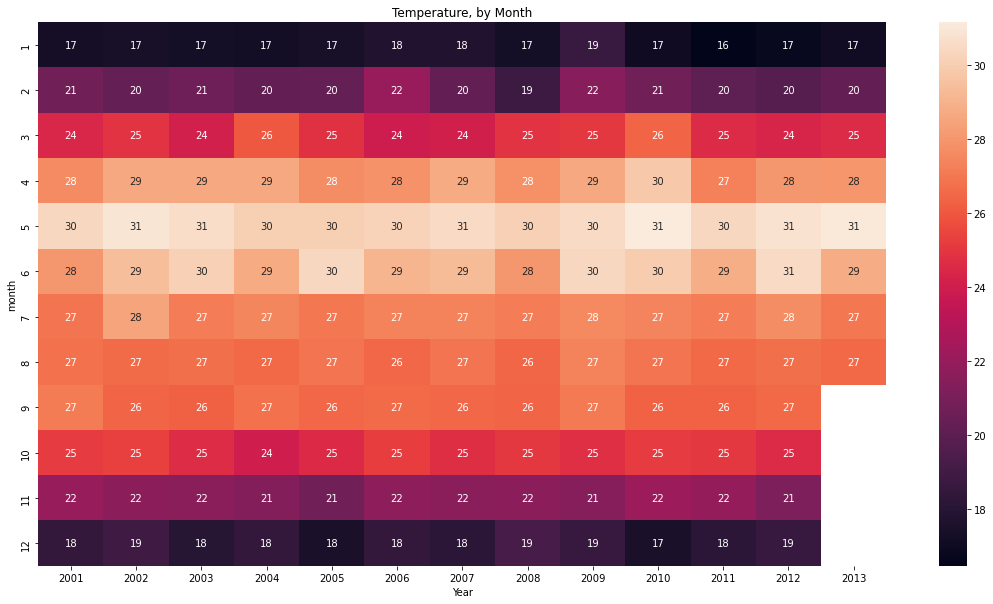

In [71]:
# Set the width and height of the figure
plt.figure(figsize=(19,10))

# Add title
plt.title("Temperature, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=pivot.loc[:,years[205:]], annot=True)

# Add label for horizontal axis
plt.xlabel("Year")

Text(0, 0.5, 'Temperature')

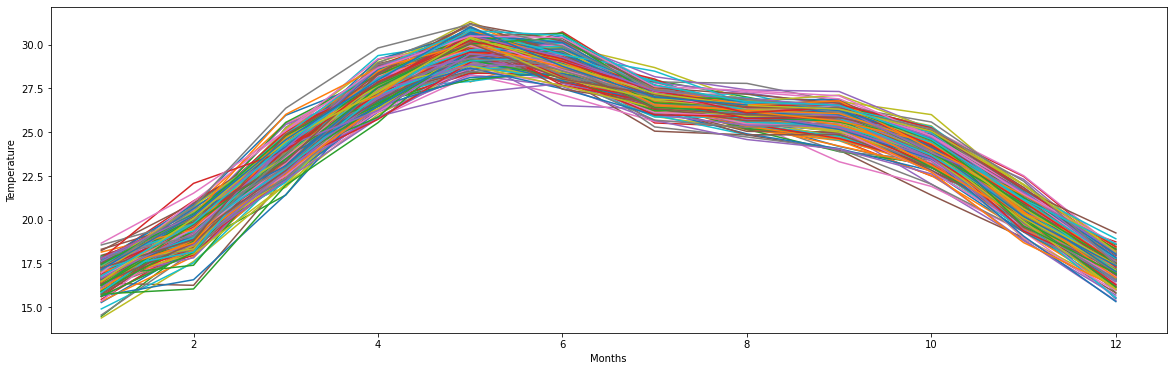

In [72]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')

- We found some kind of seasonality in the data.

<AxesSubplot:xlabel='month'>

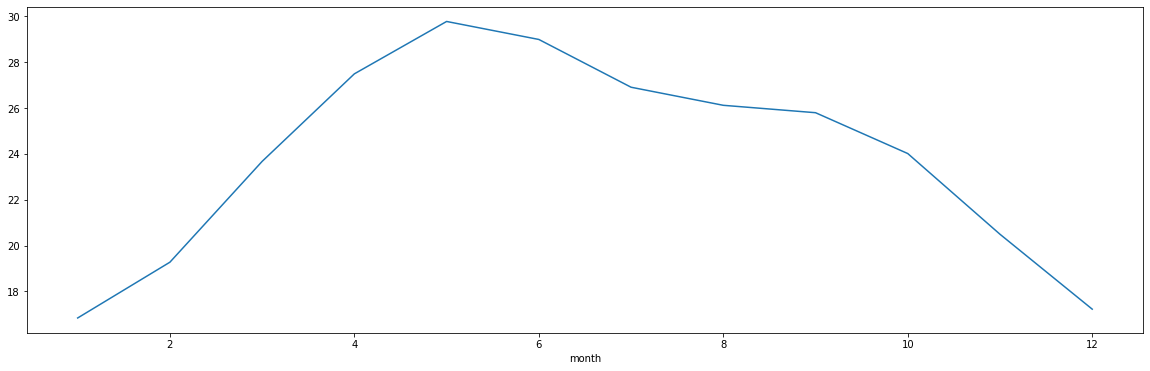

In [73]:
monthly_seasonality=pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))

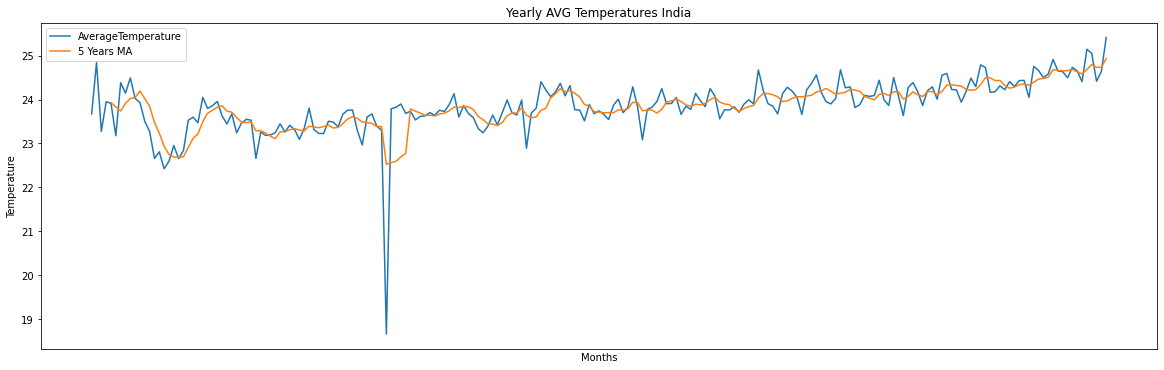

In [75]:
year_avg = pd.pivot_table(temp_India1, values='AverageTemperature', index='years', aggfunc='mean')
year_avg['5 Years MA'] = year_avg['AverageTemperature'].rolling(5).mean()
year_avg[['AverageTemperature','5 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures India')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(2007,2012,12)])
plt.show()


In [76]:
year_avg

AverageTemperature  5 Years MA
years                                
1796            23.675250         NaN
1797            24.839900         NaN
1798            23.273300         NaN
1799            23.949417         NaN
1800            23.911917   23.929957
...                   ...         ...
2009            25.146667   24.686017
2010            25.050833   24.797100
2011            24.415583   24.733800
2012            24.640833   24.731983
2013            25.413250   24.933433

[211 rows x 2 columns]

## Building Time Series

 Moving Average

In [77]:
df

AverageTemperature  AverageTemperatureUncertainty Country years  \
dt                                                                            
1796-01-01              17.044                          2.044   India  1796   
1796-02-01              19.193                          1.359   India  1796   
1796-03-01              22.319                          2.125   India  1796   
1796-04-01              27.233                          1.510   India  1796   
1796-05-01              30.035                          1.338   India  1796   
...                        ...                            ...     ...   ...   
2013-04-01              27.981                          0.299   India  2013   
2013-05-01              31.014                          0.205   India  2013   
2013-06-01              28.766                          0.299   India  2013   
2013-07-01              27.012                          0.197   India  2013   
2013-08-01              26.555                          0.242   India  2013   

           month  season  First_temp_diff  
dt                                         
1796-01-01     1  winter              NaN  
1796-02-01     2  winter              NaN  
1796-03-01     3  spring              NaN  
1796-04-01     4  spring              NaN  
1796-05-01     5  spring              NaN  
...          ...     ...              ...  
2013-04-01     4  spring            0.708  
2013-05-01     5  spring            0.593  
2013-06-01     6  summer           -0.105  
2013-07-01     7  summer           -0.197  
2013-08-01     8  summer            0.022  

[2508 rows x 7 columns]

In [78]:
df=df[['First_temp_diff']]
df.dropna(inplace=True)

In [79]:
df.head()

First_temp_diff
dt                         
1798-03-01            7.284
1798-06-01           10.176
1798-07-01            5.649
1798-08-01           -0.224
1798-09-01           -4.062

In [80]:
df['First_temp_diff'].rolling(window=12).mean()

dt
1798-03-01         NaN
1798-06-01         NaN
1798-07-01         NaN
1798-08-01         NaN
1798-09-01         NaN
                ...   
2013-04-01    0.141083
2013-05-01    0.220833
2013-06-01    0.159750
2013-07-01    0.121167
2013-08-01    0.136083
Name: First_temp_diff, Length: 2484, dtype: float64

In [81]:
value=pd.DataFrame(df['First_temp_diff'])

temp_df=pd.concat([value,df['First_temp_diff'].rolling(window=12).mean()],axis=1)

temp_df.columns=['actual_temp','forecast_temp']
temp_df.head(12)

actual_temp  forecast_temp
dt                                    
1798-03-01        7.284            NaN
1798-06-01       10.176            NaN
1798-07-01        5.649            NaN
1798-08-01       -0.224            NaN
1798-09-01       -4.062            NaN
1798-10-01       -5.363            NaN
1798-11-01       -6.091            NaN
1798-12-01       -9.830            NaN
1799-01-01       -9.310            NaN
1799-02-01       -6.055            NaN
1799-03-01        2.894            NaN
1799-04-01       12.511       -0.20175

In [83]:
np.sqrt(mean_squared_error(temp_df['forecast_temp'][11:],temp_df['actual_temp'][11:]))

1.3632478123961451

#### Using ARIMA

ARIMA Model has three parameters: p: it is the number of autoregressive lags. d: it is the order of differencing required to make the series stationary. q: it is the number of moving average lags.

ARIMA stands for Autoregressive Integrated Moving Average. It is a combination of two models which are autoregressive and moving average.

First_temp_diff    0
dtype: int64

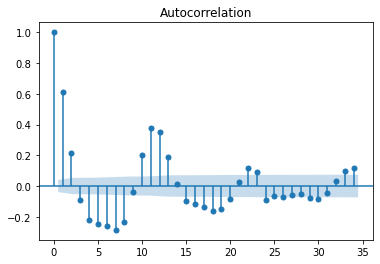

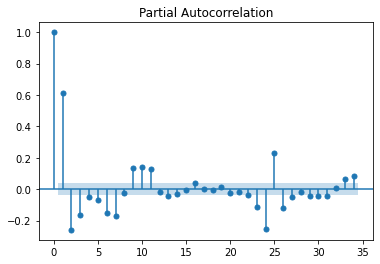

In [87]:
plot_acf(df['First_temp_diff'].dropna())

plot_pacf(df['First_temp_diff'].dropna())

df.isna().sum()

In [88]:
df

First_temp_diff
dt                         
1798-03-01            7.284
1798-06-01           10.176
1798-07-01            5.649
1798-08-01           -0.224
1798-09-01           -4.062
...                     ...
2013-04-01            0.708
2013-05-01            0.593
2013-06-01           -0.105
2013-07-01           -0.197
2013-08-01            0.022

[2484 rows x 1 columns]

In [89]:
training_data=df[0:2900]
test_data = df[2900:]

from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(training_data,order=(12,1,5))

In [109]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

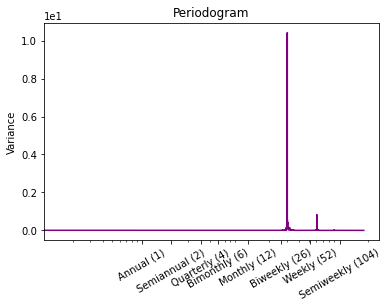

In [110]:
plot_periodogram(temp_India1["AverageTemperature"]);


Seasonal Arima

In [111]:
train = temp_India1[:2000].copy()
val = temp_India1[2000:2700].copy()
test = temp_India1[2700:].copy()

In [112]:
train

AverageTemperature  AverageTemperatureUncertainty Country years  \
dt                                                                            
1796-01-01              17.044                          2.044   India  1796   
1796-02-01              19.193                          1.359   India  1796   
1796-03-01              22.319                          2.125   India  1796   
1796-04-01              27.233                          1.510   India  1796   
1796-05-01              30.035                          1.338   India  1796   
...                        ...                            ...     ...   ...   
1970-12-01              16.999                          0.228   India  1970   
1971-01-01              16.778                          0.252   India  1971   
1971-02-01              19.526                          0.261   India  1971   
1971-03-01              23.577                          0.176   India  1971   
1971-04-01              27.642                          0.233   India  1971   

           month  season  
dt                        
1796-01-01     1  winter  
1796-02-01     2  winter  
1796-03-01     3  spring  
1796-04-01     4  spring  
1796-05-01     5  spring  
...          ...     ...  
1970-12-01    12  winter  
1971-01-01     1  winter  
1971-02-01     2  winter  
1971-03-01     3  spring  
1971-04-01     4  spring  

[2000 rows x 6 columns]

In [113]:
baseline = val['AverageTemperature'].shift()
baseline.dropna(inplace=True)
baseline.head()

dt
1971-06-01    28.794
1971-07-01    27.651
1971-08-01    26.391
1971-09-01    25.901
1971-10-01    26.050
Name: AverageTemperature, dtype: float64

In [114]:
val.iloc[1:,0]

dt
1971-06-01    27.651
1971-07-01    26.391
1971-08-01    25.901
1971-09-01    26.050
1971-10-01    24.049
               ...  
2013-04-01    27.981
2013-05-01    31.014
2013-06-01    28.766
2013-07-01    27.012
2013-08-01    26.555
Name: AverageTemperature, Length: 507, dtype: float64

In [115]:
def measure_rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 2.6056 celsius degrees


In [116]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('India Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(math.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -5.0547
p-value                           0.0000
Lags Used                        26.0000
Number of Observations Used    1973.0000
Critical Value (1%)              -3.4337
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5676
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


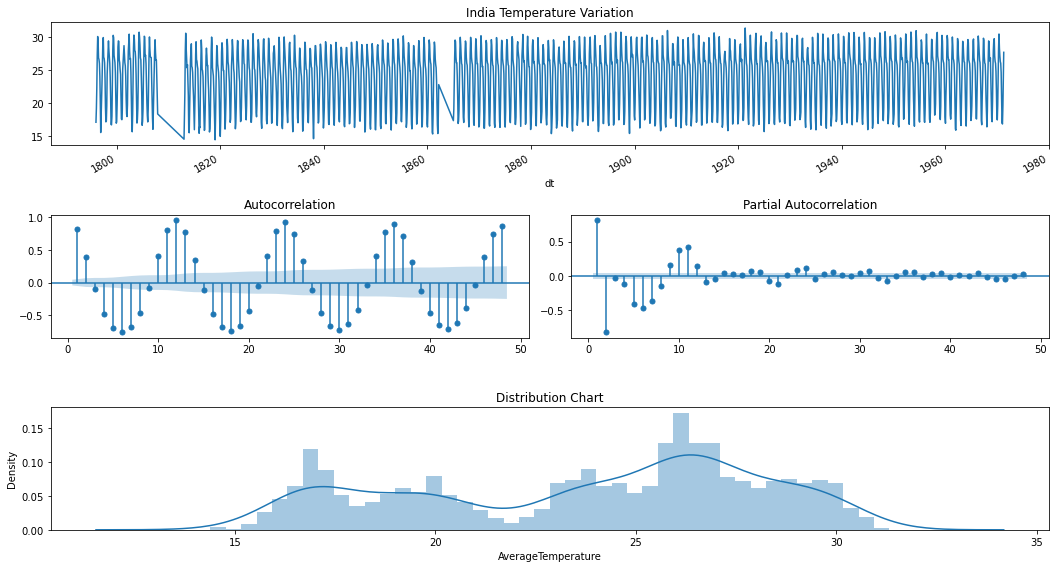

In [117]:
check_stationarity(train['AverageTemperature'])


Results of Dickey-Fuller Test:
Test Statistic                  -12.2945
p-value                           0.0000
Lags Used                        26.0000
Number of Observations Used    1961.0000
Critical Value (1%)              -3.4337
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5676
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


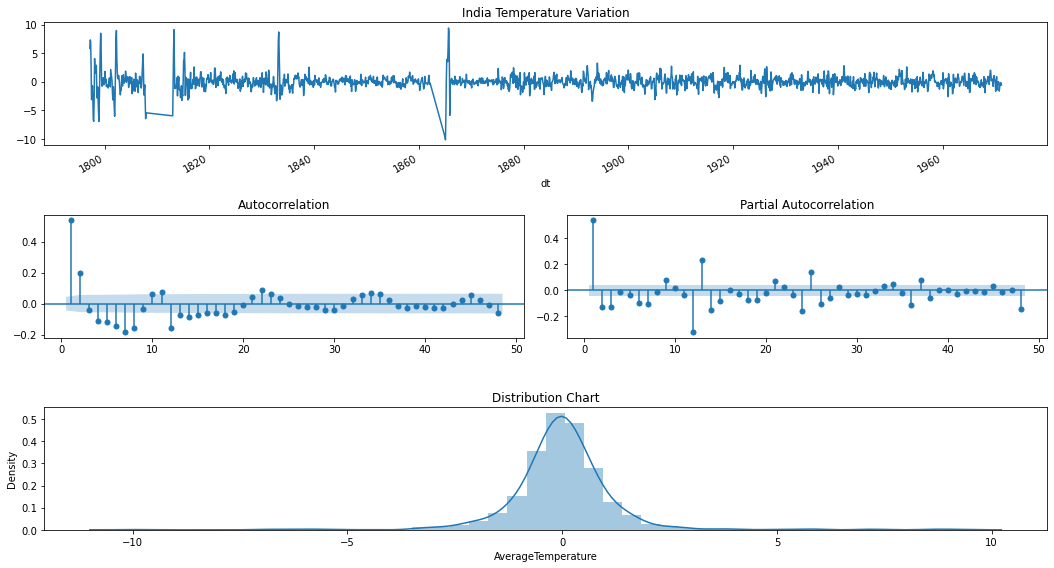

In [118]:
check_stationarity(train['AverageTemperature'].diff(12).dropna())
